### The goal of this kernel is to predict if a customer will buy an SUV based on their age and salary. The predictions will help the seller in reaching the target users to whom the product can be advertised. 

In [40]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

%matplotlib inline

In [5]:
# Change working directory
os.chdir('C:\\')

In [6]:
# Get current working directory
os.getcwd()

'C:\\'

In [41]:
# Get the dataset
data = pd.read_csv('Social_Network_Ads.csv')

In [42]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [43]:
#To get number of rows and columns in the dataset
data.shape

(400, 5)

In [44]:
#Splitting the independant and target variable from the data
X = data.iloc[:, [2,3]].values #Not considering userid since it doesn't hold much value in the prediction of target variable
y = data.iloc[:, 4].values

#### Here y variable shows if a customer actually buys the SUV or not.
#### if y = 0, customer does not buy the SUV
#### if y = 1, customer buys the SUV

In [45]:
#Now that we have the X and y variables, lets split both into train and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
#Now that we have feature scaled our test and train of independant variables, let's try fitting 
#our train set to various classification models

#Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

#Predicting the target variable y values for test set
y_predict = model.predict(X_test)

#We can now use the confusion matrix to compare the predicted results and 
#the actual values of the target variable to check the number of correct predictions
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_predict)

print(cmat)

[[65  3]
 [ 8 24]]


### Logistic Regression model has predicted 3 false positives and 8 false negatives. Correct number of predictions = 89/100

In [49]:
#Kernel SVM model
from sklearn.svm import SVC
kernelsvm = SVC(kernel = 'rbf', random_state = 0)
kernelsvm.fit(X_train, y_train)

#Predicting the target variable y values for test set
y_predict = kernelsvm.predict(X_test)

#We can now use the confusion matrix to compare the predicted results and 
#the actual values of the target variable to check the number of correct predictions
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_predict)

print(cmat)

[[64  4]
 [ 3 29]]


### Kernel SVM model has predicted 4 false positives and 3 false negatives. Correct number of predictions = 93/100

In [52]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()
naivebayes.fit(X_train, y_train)

#Predicting the target variable y values for test set
y_predict = naivebayes.predict(X_test)

#We can now use the confusion matrix to compare the predicted results and 
#the actual values of the target variable to check the number of correct predictions
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_predict)

print(cmat)

[[65  3]
 [ 7 25]]


### Naive Bayes model has predicted 3 false positives and 7 false negatives. Correct number of predictions = 90/100

In [54]:
#Decison Tree Model
from sklearn.tree import DecisionTreeClassifier
descisiontree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
descisiontree.fit(X_train, y_train)

#Predicting the target variable y values for test set
y_predict = descisiontree.predict(X_test)

#We can now use the confusion matrix to compare the predicted results and 
#the actual values of the target variable to check the number of correct predictions
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_predict)

print(cmat)

[[62  6]
 [ 3 29]]


### Desicion Tree model has predicted 6 false positives and 3 false negatives. Correct number of predictions = 91/100

In [58]:
#Randome Forest Model
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
randomforest.fit(X_train, y_train)

#Predicting the target variable y values for test set
y_predict = randomforest.predict(X_test)

#We can now use the confusion matrix to compare the predicted results and 
#the actual values of the target variable to check the number of correct predictions
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_predict)

print(cmat)

[[63  5]
 [ 3 29]]


### Random Forest model has predicted 5 false positives and 3 false negatives. Correct number of predictions = 92/100

#### Best model for this specific dataset turned out to be Kernerl SVM model with 93 correct predictions
#### Lets visualize the Kernel SVM Model to see the classification boundaries bulit based on the train data

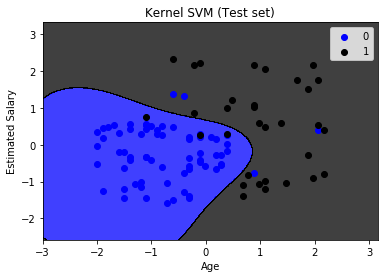

<Figure size 864x864 with 0 Axes>

In [64]:
#Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, kernelsvm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.figure(figsize=(12, 12))
plt.show()

### From the above visualization, we can see the Kernel SVM model built a non linear classification boundary based on the training set. We were able to get most of our predicitions right with this model. This doesn't necessarily prove that Kernel SVM is the go-to model when it comes to classification problems. The appropriate way to find the best model would be is to train a set of models, apply k-fold validation and round in on the best fit model. This changes on a case-to-case basis and we don't have on perfect model. 